<a href="https://colab.research.google.com/github/JennEYoon/ECG-transform/blob/main/notebooks/ecg-1Dcnn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: data explore, graphs, signal filter bands

In this notebook,  ECG signal visualization, and classification of five categories "Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]" with using the popular database MIT-BIH Arrhythmia Database.

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting and visualization
import matplotlib.image as mpimg  # For reading images
import numpy as np  # For numerical operations
import scipy  # For scientific computations
import itertools  # For advanced iteration
from datetime import datetime  # For handling date and time

**Visualization**
In this part, the electrocardiogram (ECG/EKG) signal for one patient will be visualized
Visualization steps and operations subject to DSP courseon the EKG signal

In [ ]:
# Load the ECG data from a CSV file into a DataFrame
ecg100 = pd.read_csv("/content/100.csv")
#ecg100 = pd.read_csv("/kaggle/input/mit-bih-arrhythmia-database-modern-2023/100.csv")
# Display the first few rows of the DataFrame to understand its structure
ecg100

,Unnamed: 0,time_ms,MLII,V5
0,0,0.000000e+00,-0.145,-0.065
1,1,2.777778e+00,-0.145,-0.065
2,2,5.555556e+00,-0.145,-0.065
3,3,8.333333e+00,-0.145,-0.065
4,4,1.111111e+01,-0.145,-0.065
...,...,...,...,...
649995,649995,1.805542e+06,-0.075,-0.480
649996,649996,1.805544e+06,-0.445,-0.410
649997,649997,1.805547e+06,-0.675,-0.365
649998,649998,1.805550e+06,-0.765,-0.335


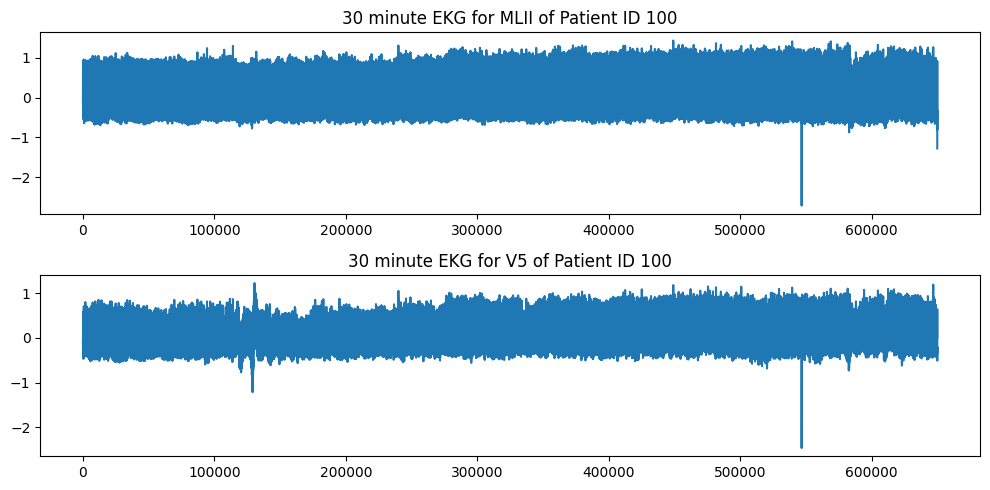

In [ ]:
# Create a figure with a specified size for the plots
plt.figure(figsize=(10, 5))

# Create the first subplot in a 2-row, 1-column layout
plt.subplot(2, 1, 1)
# Plot the "MLII" column from the DataFrame to visualize the ECG signal for lead MLII
plt.plot(ecg100["MLII"])
# Set the title for the first subplot
plt.title("30 minute EKG for MLII of Patient ID 100")

# Create the second subplot in the same 2-row, 1-column layout
plt.subplot(2, 1, 2)
# Plot the "V5" column from the DataFrame to visualize the ECG signal for lead V5
plt.plot(ecg100["V5"])
# Set the title for the second subplot
plt.title("30 minute EKG for V5 of Patient ID 100")

# Adjust the layout to ensure that subplots do not overlap
plt.tight_layout()

In [ ]:
# Print descriptive statistics for the "MLII" column
# This includes count, mean, standard deviation, min, 25th percentile, median (50th percentile), 75th percentile, and max
print(ecg100["MLII"].describe(), "\n")

# Print descriptive statistics for the "V5" column
print(ecg100["V5"].describe())

count    650000.000000
mean         -0.306299
std           0.193200
min          -2.715000
25%          -0.390000
50%          -0.335000
75%          -0.270000
max           1.435000
Name: MLII, dtype: float64 

count    650000.000000
mean         -0.191034
std           0.148213
min          -2.465000
25%          -0.265000
50%          -0.205000
75%          -0.145000
max           1.225000
Name: V5, dtype: float64


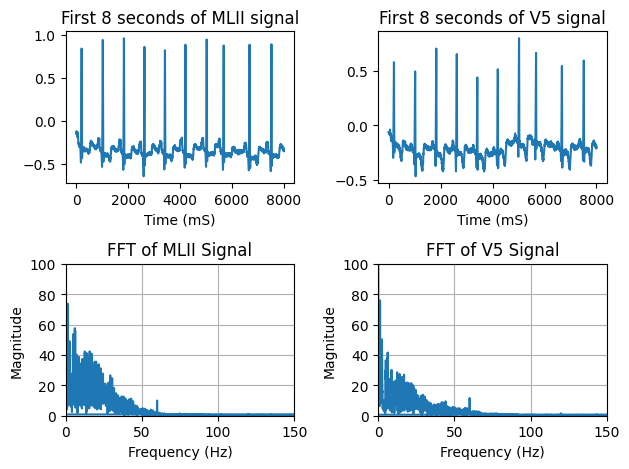

In [ ]:
time = 8  # 8 seconds of data
fs = 360 # Sampling frequency (Hz)

MLII_data = ecg100[0: time*fs]["MLII"].values
MLIIF = scipy.fft.fft(MLII_data)

V5_data = ecg100[0: time*fs]["V5"].values
V5F = scipy.fft.fft(V5_data)

t = ecg100[0: time*fs]["time_ms"].values
frequencies = np.fft.fftfreq(len(V5_data), 1/fs)

plt.subplot(2, 2, 1)
plt.plot(t, MLII_data)
plt.title("First 8 seconds of MLII signal")
plt.xlabel('Time (mS)')

plt.subplot(2, 2, 2)
plt.plot(t, V5_data)
plt.title("First 8 seconds of V5 signal")
plt.xlabel('Time (mS)')

plt.subplot(2, 2, 3)
plt.plot(frequencies, np.abs(MLIIF))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of MLII Signal')
# Set axis limits
plt.ylim(0, 100)
plt.xlim(0, 150)
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(frequencies, np.abs(V5F))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of V5 Signal')
# Set axis limits
plt.ylim(0, 100)
plt.xlim(0, 150)
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

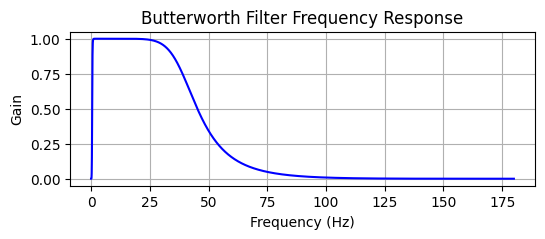

In [ ]:
# Define bandpass filter parameters
lowcut = 0.5  # Low cutoff frequency (Hz)
highcut = 40  # High cutoff frequency (Hz)
order = 4    # Filter order

# Design the bandpass filter
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = scipy.signal.butter(order, [low, high], btype='band')

# Plot the frequency response of the filter
w, h = scipy.signal.freqz(b, a, worN=8000)
frequencies = (fs * 0.5 / np.pi) * w
plt.figure(figsize=(6, 2))
plt.plot(frequencies, abs(h), 'b')
plt.title('Butterworth Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.show()

Apply filters to the ECG signals

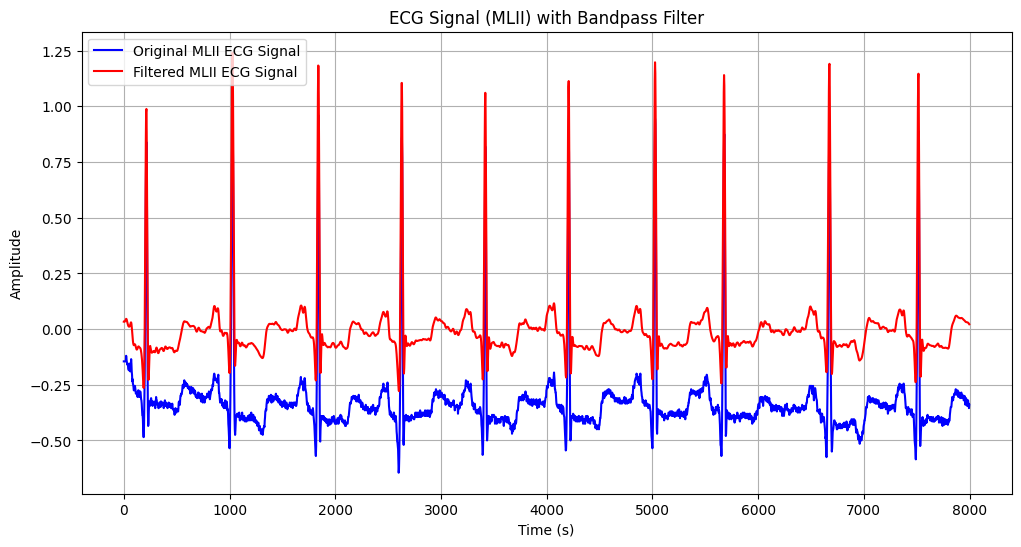

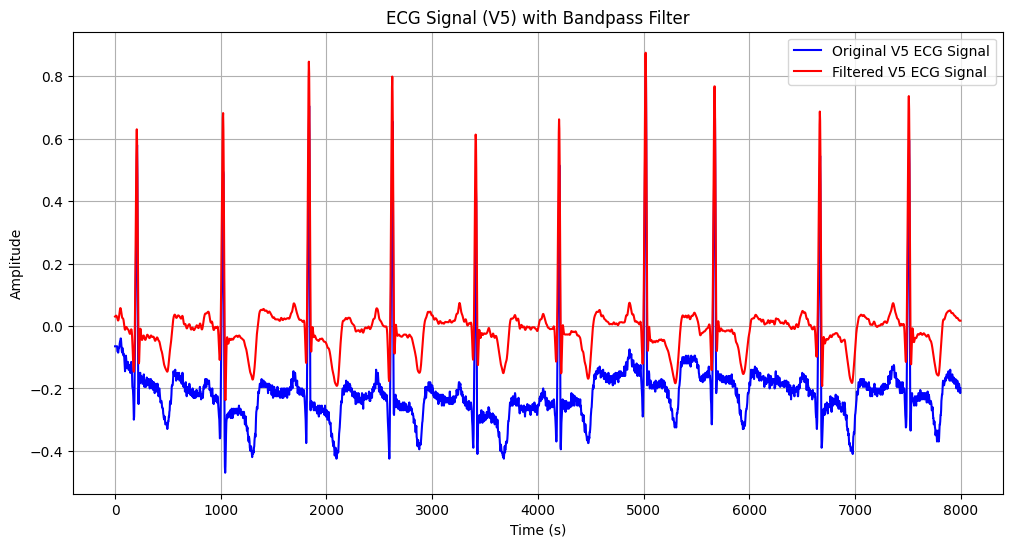

In [ ]:
filtered_MLII_signal = scipy.signal.filtfilt(b, a, MLII_data)
# Plot original and filtered signals
plt.figure(figsize=(12, 6))
plt.plot(t, MLII_data, 'b', label='Original MLII ECG Signal')
plt.plot(t, filtered_MLII_signal, 'r', label='Filtered MLII ECG Signal')
plt.title('ECG Signal (MLII) with Bandpass Filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

filtered_V5_signal = scipy.signal.filtfilt(b, a, V5_data)
# Plot original and filtered signals
plt.figure(figsize=(12, 6))
plt.plot(t, V5_data, 'b', label='Original V5 ECG Signal')
plt.plot(t, filtered_V5_signal, 'r', label='Filtered V5 ECG Signal')
plt.title('ECG Signal (V5) with Bandpass Filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

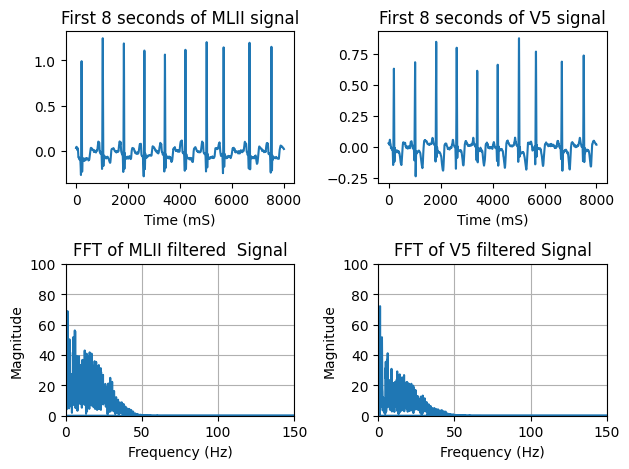

In [ ]:
MLIIFF = scipy.fft.fft(filtered_MLII_signal)
V5FF = scipy.fft.fft(filtered_V5_signal)
frequencies = np.fft.fftfreq(len(filtered_V5_signal), 1/fs)

plt.subplot(2, 2, 1)
plt.plot(t, filtered_MLII_signal)
plt.title("First 8 seconds of MLII signal")
plt.xlabel('Time (mS)')

plt.subplot(2, 2, 2)
plt.plot(t, filtered_V5_signal)
plt.title("First 8 seconds of V5 signal")
plt.xlabel('Time (mS)')

plt.subplot(2, 2, 3)
plt.plot(frequencies, np.abs(MLIIFF))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of MLII filtered  Signal')
# Set axis limits
plt.ylim(0, 100)
plt.xlim(0, 150)
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(frequencies, np.abs(V5FF))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of V5 filtered Signal')
# Set axis limits
plt.ylim(0, 100)
plt.xlim(0, 150)
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

## Step 2: ECG Diagnosis Using 1D CNN  
Jennifer Yoon, start here  
Upload data files manually to Google Colab

In [1]:
# Import supporting libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting and visualization
# import matplotlib.image as mpimg  # For reading images
import numpy as np  # For numerical operations
# import scipy  # For scientific computations
# import itertools  # For advanced iteration
from datetime import datetime  # For handling date and time

In [ ]:
# Use Colob, local data, uploaded manually.
train = pd.read_csv('/content/mitbih_train.csv', header=None)
test = pd.read_csv('/content/mitbih_test.csv', header=None)

#train = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv', header=None)
#test = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv', header=None)

X_train, y_train = train.iloc[:, :187], train[187]
X_test, y_test = test.iloc[:, :187], test[187]

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(87554, 187) (87554,) (21892, 187) (21892,)


In [ ]:
print(X_train.head(2), y_train.head(5), X_test.head(2), y_test.head(5))

        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   

        7         8         9    ...  177  178  179  180  181  182  183  184  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   185  186  
0  0.0  0.0  
1  0.0  0.0  

[2 rows x 187 columns] 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 187, dtype: float64         0         1         2         3         4         5         6    \
0  1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1  0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   

        7         8         9    ...  177  178  179  180  181  182  183  184  \
0  0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.30769

In [ ]:
# Import main PyTorch libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader for training and testing data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

print(type(X_train), type(train_dataset), type(train_loader))

<class 'pandas.core.frame.DataFrame'> <class 'torch.utils.data.dataset.TensorDataset'> <class 'torch.utils.data.dataloader.DataLoader'>


In [ ]:
# Define the model
class ECGNet(nn.Module):
    def __init__(self, num_classes):
        super(ECGNet, self).__init__()
        # Layer 1
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=80, stride=4, padding=38)
        self.bn1 = nn.BatchNorm1d(128)
        self.maxpool1 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)  # Adjusted kernel size and stride
        # Layer 2
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(128)
        self.maxpool2 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)  # Adjusted kernel size and stride
        # Layer 3
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(256)
        self.maxpool3 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)  # Adjusted kernel size and stride
        # Layer 4
        self.conv4 = nn.Conv1d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm1d(512)
        self.maxpool4 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)  # Adjusted kernel size and stride
        # Output layer
        self.avgpool = nn.AdaptiveAvgPool1d(1)  # AdaptiveAvgPool1d to handle variable input lengths
        self.fc = nn.Linear(512, num_classes)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        # Layer 1
        x = self.maxpool1(self.bn1(torch.relu(self.conv1(x))))
        # Layer 2
        x = self.maxpool2(self.bn2(torch.relu(self.conv2(x))))
        # Layer 3
        x = self.maxpool3(self.bn3(torch.relu(self.conv3(x))))
        # Layer 4
        x = self.maxpool4(self.bn4(torch.relu(self.conv4(x))))
        # Output layer
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = self.log_softmax(x)
        return x

# Instantiate the model
num_classes = 5  # Change to the actual number of classes in your dataset
model = ECGNet(num_classes)
# Define loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Model defined and initiated.")
print(type(ECGNet), type(model))

Model defined and initiated.
<class 'type'> <class '__main__.ECGNet'>


In [ ]:
# Training the model
num_epochs = 10
start_time = datetime.now()  # datetime library
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')
end_time = datetime.now()
print("\nTotal training time: {}".format(end_time - start_time))

Epoch [1/10], Train Loss: 177.6508, Train Accuracy: 96.45%
Epoch [2/10], Train Loss: 120.6040, Train Accuracy: 97.49%
Epoch [3/10], Train Loss: 99.0176, Train Accuracy: 97.94%
Epoch [4/10], Train Loss: 84.4468, Train Accuracy: 98.16%
Epoch [5/10], Train Loss: 77.1229, Train Accuracy: 98.26%
Epoch [6/10], Train Loss: 66.7921, Train Accuracy: 98.48%
Epoch [7/10], Train Loss: 61.8984, Train Accuracy: 98.57%
Epoch [8/10], Train Loss: 56.0766, Train Accuracy: 98.65%
Epoch [9/10], Train Loss: 48.7487, Train Accuracy: 98.82%
Epoch [10/10], Train Loss: 46.5979, Train Accuracy: 98.87%

Total training time: 0:14:33.886732


In [ ]:
# Evaluation on test set
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Test Loss: 19.6069, Test Accuracy: 98.43%


Remarks:  
Add graph for training/test loss  

What are units for Training loss?  
How come results are so good even from 1st epoch?  
Was training data shuffled?  

Jennifer Notes, Jan 7, 2025.

## Step 3: Run same model for PTB data, 2 classes  
To be continued. Stopped JAN 7, 2025 11:30 am

In [ ]:
# Use Colob, local data, uploaded manually.
# Kaggle data has different file format for PTB, abnormal and normal.
# ECGT paper has .pt file for PTB with split into normal and abnormal.
# use instead. Load here.

train = pd.read_csv('/content/ptb_train.csv', header=None)
test = pd.read_csv('/content/ptb_test.csv', header=None)

# To change format for PTB dataset.
X_train, y_train = train.iloc[:, :187], train[187]
X_test, y_test = test.iloc[:, :187], test[187]